Data Understanding


1. Import del Dataset

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trestbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>],
       [<AxesSubplot: title={'center': 'exang'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'thal'}>,
        <AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

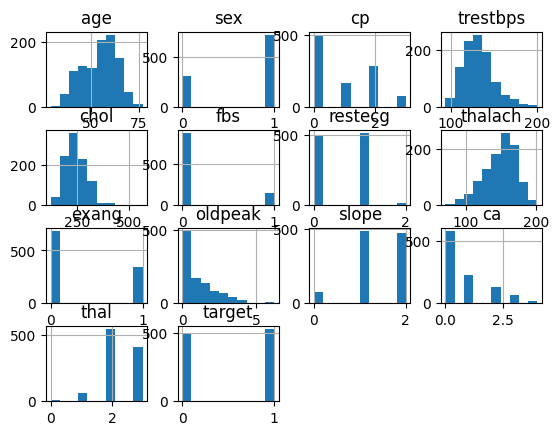

In [4]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("./heart.csv", sep=",")
istogramma = data[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]]
data.hist()

2. Controllo dati NULL

<AxesSubplot: >

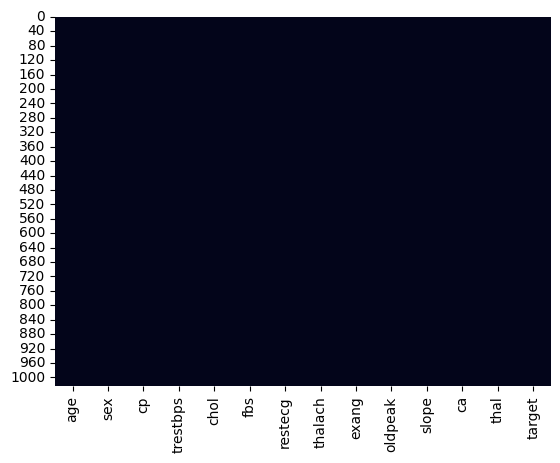

In [3]:
#controllo se ci sono dati mancanti
sns.heatmap(data.isna(), cbar=False)

3. Controllo del bilanciamento del dataset

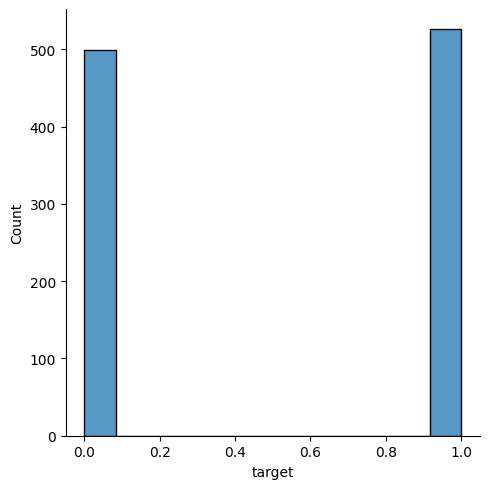

In [87]:
sns.displot(data=data, x="target")

Fase di preprocessing

In [61]:
import pandas as pd
import matplotlib as plb
import matplotlib.pyplot as plt
from sklearn import preprocessing
import imblearn
from collections import Counter

def pre(data): 
    to_drop_columns = [ 'exang', 'ca', 'thal', 'slope', 'oldpeak']
    data.drop(to_drop_columns, axis=1, inplace=True)
    colonne_tenute = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach", "target"]
    
    scaler = preprocessing.MinMaxScaler((0, 1))
    data = scaler.fit_transform(data)
    data = pd.DataFrame(data=data, columns=colonne_tenute)

    oversample = imblearn.over_sampling.SMOTE() #usa k-nearest-neighbours
    x_data, y_data = oversample.fit_resample(data.iloc[: , : -1], data["target"])

    return x_data, y_data
        

Scelta dei parametri per il classificatore con Algoritmo Genetico



Set: Average time of function evaluating (secs): 0.0014928197860717774 (total = 0.14928197860717773)

Best score before optimization: -0.7416267942583733
____________________ 1.0% GA is running...1 gen from 100...best value = -0.7416267942583733

/Users/leopoldotodisco/Desktop/HeartCare_IA/HeartCare_AI/environment/lib/python3.10/site-packages/geneticalgorithm2/geneticalgorithm2.py:195: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


                                                                                                                                                                                                        
 The best found solution:
 [ 9. 24. 17.  6.]

 Objective function:
 -0.8325358851674641

 Used generations: 100
 Used time: 14.1 seconds


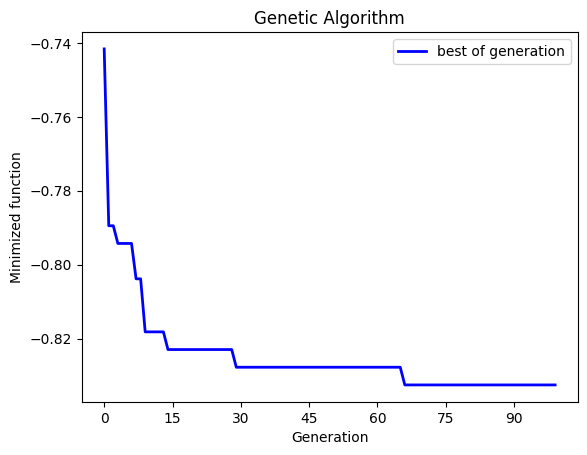

GAResult(last_generation=Generation(variables=array([[  9.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  6.,  24.,  17.,   6.],
       [  9.,  24.,  17.,   6.

In [62]:
from geneticalgorithm2 import geneticalgorithm2 as ga
from geneticalgorithm2 import Crossover
from geneticalgorithm2 import Mutations
from geneticalgorithm2 import Selection
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import f1_score

x_train, y_train = pre(data)
size_popolazione = 100
crossover_probability = 0.5
popolazione = {}
mutation_prob = 0.01

""" 
    max_depth: vale massimo 20
    min_samples_split: tra 2 e 500
    min_sample_leaf: tra 1 e 1000
    max_features: tra 1 e 9
"""
var_types = np.array(["int","int","int","int"])
vincoli = np.array([[1, 20], [1, 1000], [1, 1000], [1, 9]])

alg_param = {
            'max_num_iteration': 100,
            'population_size': size_popolazione,
            'mutation_probability': mutation_prob,
            'elit_ratio': 0.2,
            'parents_portion' : 0.2,
            'crossover_probability': crossover_probability,
            'crossover_type': Crossover.one_point(),
            'mutation_type': Mutations.uniform_by_center(),
            'selection_type': Selection.tournament(tau=3),    #DA VEDERE IL PARAMETRO
}

#f-measure
#fitness in questa libreria è una funzione di minimo perciò restituiamo -result.
def fitness(param):
    tree = DecisionTreeClassifier(max_depth= int(param[0]), 
                                min_samples_split= int(param[1]), 
                                min_samples_leaf= int(param[2]), 
                                max_features= int(param[3]))
    #490 è il 70% di 700
    tree.fit(x_train[:490], y_train[:490])
    prediction = tree.predict(x_train[491:700])
    result = f1_score(prediction, y_train[491:700], average='micro')
    return -result

genetico = ga(function=fitness, dimension=4, variable_type="int", variable_boundaries=vincoli, algorithm_parameters=alg_param)
genetico.run()


Validazione

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute


#x_train sono le istanze senza il target
flag = 0
# 18. 37. 10.  4.
""" 
    max_depth: vale massimo 20
    min_samples_split: tra 2 e 500
    min_sample_leaf: tra 1 e 1000
    max_features: tra 1 e 9

    [9, 6, 6, 18] -> il migliore con precision a 90%

    [ 9. 24. 17.  6.] 

"""

for i in range (0, 10):
    cv = KFold(n_splits=10)
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=6, min_samples_leaf=6, max_features=18)
    score = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1) #errore assoluto per 10 split
    flag = flag + mean(absolute(score))

print(flag/10)
#fa 10 volte il training e stampa la media dell'errore assoluto di ogni validazione



0.11446540880503142


Training e Testing

In [80]:

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import mlflow

"""
[ 9. 24. 17.  6.]
max_depth	9
max_features	6
min_samples_leaf	6
min_samples_split	18

"""

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow_experiment_id = 0
with mlflow.start_run(experiment_id=mlflow_experiment_id):
    mlflow.log_param("max_depth", 9)
    mlflow.log_param("min_samples_split", 18)
    mlflow.log_param("min_samples_leaf", 6)
    mlflow.log_param("max_features", 6)

    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=6, min_samples_leaf=6, max_features=18)
    model.fit(x_train[:700], y_train[:700])
    mlflow.sklearn.log_model(model, "decision_tree")
    prediction = model.predict(x_train[701:])

    recall_value = recall_score(y_train[701:], prediction)
    print("recall = ", recall_value)

    precision_value = precision_score(y_train[701:], prediction)
    print("precision = ", precision_value)

    accuracy_value = accuracy_score(y_train[701:], prediction)
    print("accuracy = ", accuracy_value)

    fmeasure_value = f1_score(y_train[701:], prediction)
    print("f1 = ", fmeasure_value)

    mlflow.log_metric("recall_score", recall_value)
    mlflow.log_metric("precision_score", precision_value)
    mlflow.log_metric("accuracy_score", accuracy_value)
    mlflow.log_metric("fmeasure_score", fmeasure_value)

    mlflow.end_run()


recall =  0.8170731707317073
precision =  0.9305555555555556
accuracy =  0.886039886039886
f1 =  0.8701298701298701
